In [17]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from numpy import *
import scipy.io as sio

In [19]:
mat = sio.loadmat('ex3data1.mat')

In [50]:
y = mat['y']
X = mat['X']
m = X.shape[0]

<IPython.core.display.Javascript object>


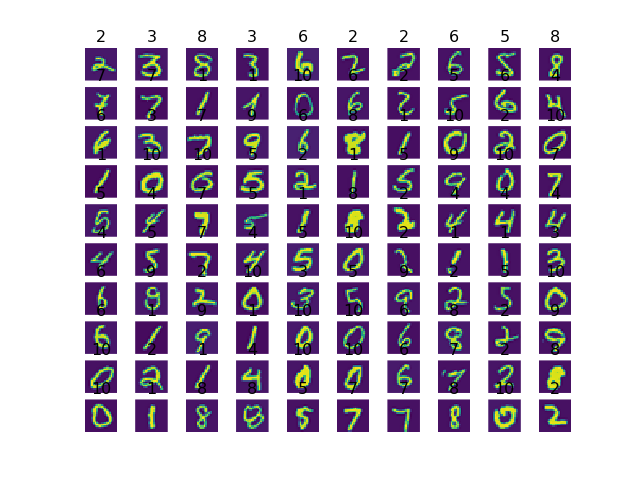

In [49]:
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True)
indices = np.random.randint(0, m, 100)
X_plot = X[indices, :]
y_plot = y[indices].flatten()
for nax, ax in enumerate(axes.flatten()):
    ax.imshow(X_plot[nax,:].reshape((20,20)).T, cmap='viridis', interpolation='none')
    ax.set_title(str(y_plot[nax]))
    ax.axis('off')

In [51]:
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                         # (note that we have mapped "0" to label 10)

In [70]:
print('\nTesting lrCostFunction()')

theta_t = [-2, -1, 1, 2]
X_t = np.c_[ones((5,1)), arange(1,16).reshape((5,3), order='F')/10]
y_t = (array([1,0,1,0,1]) >= 0.5)
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t);

print('\nCost: %f'% J)
print('Expected cost: 2.534819')
print('Gradients:')
print(' %f '% grad)
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003')





Testing lrCostFunction()


NameError: name 'lrCostFunction' is not defined

In [2]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [15]:
PDF('ex3.pdf',size=(900,500))

In [56]:
np.c_[ones((5,1)), ones((5,1))]

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [ ]:
# %load ex3.m
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction()');

theta_t = [-2; -1; 1; 2];
X_t = np.c_[ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');

fprintf('Program paused. Press enter to continue.\n');
pause;
%% ============ Part 2b: One-vs-All Training ============
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

